In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bibliotheque import *
import tqdm
%matplotlib inline

In [3]:
root = '/crnldata/'

In [31]:
def load_df():
    spindle_file = root + 'cmo/Etudiants/Valentin_G/Sleep_EEG_Respi/df_analyse/spindles_N2.xlsx'
    rsp_cycle_file = root + 'cmo/Etudiants/Valentin_G/Sleep_EEG_Respi/df_analyse/resp_features.xlsx'
    df_cycles = pd.read_excel(rsp_cycle_file).drop(columns = 'Unnamed: 0').loc[:,['cycle_num','inspi_index','expi_index','inspi_time','expi_time','insp_duration','exp_duration','cycle_duration']]
    spindles = pd.read_excel(spindle_file).drop(columns = 'Unnamed: 0')
    end_cycles = []
    for cycle in range(df_cycles.shape[0]):
        end_resp = df_cycles.loc[cycle, 'inspi_time'] + df_cycles.loc[cycle, 'cycle_duration']
        end_cycles.append(end_resp)
    df_cycles['end_time'] = end_cycles
    df_cycles
    
    return df_cycles , spindles

In [32]:
df_cycles , spindles = load_df()

In [33]:
df_cycles

,cycle_num,inspi_index,expi_index,inspi_time,expi_time,insp_duration,exp_duration,cycle_duration,end_time
0,0,156,430,0.609375,1.679688,1.070312,1.890625,2.960938,3.570312
1,1,914,1199,3.570312,4.683594,1.113281,2.027344,3.140625,6.710938
2,2,1718,1983,6.710938,7.746094,1.035156,2.101562,3.136719,9.847656
3,3,2521,2791,9.847656,10.902344,1.054688,2.085938,3.140625,12.988281
4,4,3325,3549,12.988281,13.863281,0.875000,1.660156,2.535156,15.523438
...,...,...,...,...,...,...,...,...,...
3914,3914,2898795,2899030,11323.417969,11324.335938,0.917969,1.855469,2.773438,11326.191406
3915,3915,2899505,2899760,11326.191406,11327.187500,0.996094,1.574219,2.570312,11328.761719
3916,3916,2900163,2900393,11328.761719,11329.660156,0.898438,1.898438,2.796875,11331.558594
3917,3917,2900879,2901125,11331.558594,11332.519531,0.960938,1.585938,2.546875,11334.105469


In [25]:
spindles

,stage,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,N2,59.062500,59.421875,59.949219,0.886719,50.552506,9.198861,1.681054,0.273213,13.133270,9,0.403509,Fp2-C4,0
1,N2,61.679688,62.152344,62.363281,0.683594,45.307265,11.034409,2.248550,0.552724,12.831320,9,0.687500,Fp2-C4,0
2,N2,65.433594,65.742188,66.015625,0.582031,44.304907,10.309570,2.206756,0.374857,13.944231,8,0.526667,Fp2-C4,0
3,N2,67.644531,67.765625,68.296875,0.652344,48.667588,11.655442,2.139002,0.361876,14.613934,8,0.184524,Fp2-C4,0
4,N2,87.617188,87.996094,88.328125,0.710938,50.774271,10.271449,1.864006,0.237175,13.915260,7,0.530055,Fp2-C4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,N2,10650.789062,10650.921875,10651.527344,0.738281,53.699516,11.466963,2.057794,0.347915,13.990410,10,0.178947,T3-O1,7
3933,N2,10848.859375,10849.191406,10849.449219,0.589844,46.845153,12.360291,2.203372,0.294651,13.509131,8,0.559211,T3-O1,7
3934,N2,10881.660156,10882.257812,10882.429688,0.769531,55.876462,12.462484,1.994074,0.287606,13.846079,10,0.772727,T3-O1,7
3935,N2,11121.531250,11122.054688,11122.546875,1.015625,50.616274,10.266257,1.963956,0.387135,13.169566,13,0.513410,T3-O1,7


In [26]:
def is_there_spindle_in_cycle(df_cycles=df_cycles, spindles=spindles):
    rows = []
    loop = range(df_cycles.shape[0])
    loop = tqdm.tqdm(loop , desc = 'cycle rsp')
    for i in loop:
        start = df_cycles.loc[i,'inspi_time']
        transition = df_cycles.loc[i,'expi_time']
        stop = df_cycles.loc[i,'end_time']

        for j in range(spindles.shape[0]):
            spindle_time = spindles.loc[j , 'Peak']
            spindle_loc = spindles.loc[j, 'Channel']
            if spindle_time > start and spindle_time < transition:
                spindle_occuring = 'i'
            elif spindle_time > transition and spindle_time < stop:
                spindle_occuring = 'e'
            else:
                spindle_occuring = None

            row = [i, start, transition ,stop, spindle_time, spindle_loc, spindle_occuring]
            rows.append(row)

    df_analyse = pd.DataFrame(rows, columns = ['n_cycle','start','transition','stop','spindle peak','spindle chan', 'spindle occuring'])
    return df_analyse

In [27]:
df_analyse = is_there_spindle_in_cycle()

cycle rsp:   1%|█▌                                                                                                                                                                                        | 33/3919 [00:02<04:17, 15.10it/s]


KeyboardInterrupt: 

In [104]:
def get_phases_resp_timings(nbins = 10):
    loop = range(df_cycles.shape[0])
    loop = tqdm.tqdm(loop , desc = 'cycle rsp')
    phases_resps_labels = np.arange(1, nbins + 1 , 1)
    df_phase_resp_timings = pd.DataFrame(columns = phases_resps_labels)
    for cycle in loop:
        start = df_cycles.loc[cycle,'inspi_time']
        transition = df_cycles.loc[cycle,'expi_time']
        stop = df_cycles.loc[cycle,'end_time']
        insp_duration = df_cycles.loc[cycle,'insp_duration']
        exp_duration = df_cycles.loc[cycle,'exp_duration']
        # cycle_duration = df_cycles.loc[cycle,'cycle_duration']
        
        print(np.linspace(start, stop, nbins + 1))

#         n_cuts = 4
#         for i in range(n_cuts):
#             ti = i+1
#             i_i = f'i{ti}'
#             df_phase_resp_timings.loc[cycle, i_i] = start + i/n_cuts*insp_duration

#         n_cuts = 6
#         for i in range(n_cuts):
#             ti = i+1
#             e_i = f'e{ti}'
#             df_phase_resp_timings.loc[cycle, e_i] = transition + i/n_cuts*exp_duration
            
#         df_phase_resp_timings.loc[cycle, 'end'] = stop
    return df_phase_resp_timings

In [105]:
df_phase_resp_timings = get_phases_resp_timings()
df_phase_resp_timings

cycle rsp:  17%|██████████████████████████████▊                                                                                                                                                        | 661/3919 [00:00<00:00, 3308.54it/s]

[0.609375   0.90546875 1.2015625  1.49765625 1.79375    2.08984375
 2.3859375  2.68203125 2.978125   3.27421875 3.5703125 ]
[3.5703125 3.884375  4.1984375 4.5125    4.8265625 5.140625  5.4546875
 5.76875   6.0828125 6.396875  6.7109375]
[6.7109375  7.02460937 7.33828125 7.65195313 7.965625   8.27929688
 8.59296875 8.90664062 9.2203125  9.53398437 9.84765625]
[ 9.84765625 10.16171875 10.47578125 10.78984375 11.10390625 11.41796875
 11.73203125 12.04609375 12.36015625 12.67421875 12.98828125]
[12.98828125 13.24179688 13.4953125  13.74882812 14.00234375 14.25585938
 14.509375   14.76289063 15.01640625 15.26992187 15.5234375 ]
[15.5234375  15.82382813 16.12421875 16.42460937 16.725      17.02539062
 17.32578125 17.62617188 17.9265625  18.22695313 18.52734375]
[18.52734375 18.8046875  19.08203125 19.359375   19.63671875 19.9140625
 20.19140625 20.46875    20.74609375 21.0234375  21.30078125]
[21.30078125 21.58671875 21.87265625 22.15859375 22.44453125 22.73046875
 23.01640625 23.30234375 23

cycle rsp:  34%|█████████████████████████████████████████████████████████████▊                                                                                                                        | 1332/3919 [00:00<00:00, 3337.49it/s]


[1935.87890625 1936.165625   1936.45234375 1936.7390625  1937.02578125
 1937.3125     1937.59921875 1937.8859375  1938.17265625 1938.459375
 1938.74609375]
[1938.74609375 1939.04882812 1939.3515625  1939.65429688 1939.95703125
 1940.25976562 1940.5625     1940.86523438 1941.16796875 1941.47070312
 1941.7734375 ]
[1941.7734375  1942.08867188 1942.40390625 1942.71914062 1943.034375
 1943.34960938 1943.66484375 1943.98007813 1944.2953125  1944.61054687
 1944.92578125]
[1944.92578125 1945.22929688 1945.5328125  1945.83632812 1946.13984375
 1946.44335938 1946.746875   1947.05039063 1947.35390625 1947.65742187
 1947.9609375 ]
[1947.9609375  1948.24492188 1948.52890625 1948.81289062 1949.096875
 1949.38085938 1949.66484375 1949.94882813 1950.2328125  1950.51679687
 1950.80078125]
[1950.80078125 1951.06875    1951.33671875 1951.6046875  1951.87265625
 1952.140625   1952.40859375 1952.6765625  1952.94453125 1953.2125
 1953.48046875]
[1953.48046875 1953.7640625  1954.04765625 1954.33125    1954

cycle rsp:  51%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                         | 2002/3919 [00:00<00:00, 3338.99it/s]


[3856.4375     3856.74296875 3857.0484375  3857.35390625 3857.659375
 3857.96484375 3858.2703125  3858.57578125 3858.88125    3859.18671875
 3859.4921875 ]
[3859.4921875 3859.7984375 3860.1046875 3860.4109375 3860.7171875
 3861.0234375 3861.3296875 3861.6359375 3861.9421875 3862.2484375
 3862.5546875]
[3862.5546875  3862.86992187 3863.18515625 3863.50039062 3863.815625
 3864.13085938 3864.44609375 3864.76132813 3865.0765625  3865.39179688
 3865.70703125]
[3865.70703125 3865.98945313 3866.271875   3866.55429688 3866.83671875
 3867.11914062 3867.4015625  3867.68398437 3867.96640625 3868.24882812
 3868.53125   ]
[3868.53125    3868.81953125 3869.1078125  3869.39609375 3869.684375
 3869.97265625 3870.2609375  3870.54921875 3870.8375     3871.12578125
 3871.4140625 ]
[3871.4140625  3871.70898438 3872.00390625 3872.29882812 3872.59375
 3872.88867188 3873.18359375 3873.47851562 3873.7734375  3874.06835938
 3874.36328125]
[3874.36328125 3874.58984375 3874.81640625 3875.04296875 3875.26953125


cycle rsp:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 2674/3919 [00:00<00:00, 3341.29it/s]


[5770.5546875  5770.81992187 5771.08515625 5771.35039062 5771.615625
 5771.88085938 5772.14609375 5772.41132813 5772.6765625  5772.94179688
 5773.20703125]
[5773.20703125 5773.490625   5773.77421875 5774.0578125  5774.34140625
 5774.625      5774.90859375 5775.1921875  5775.47578125 5775.759375
 5776.04296875]
[5776.04296875 5776.3296875  5776.61640625 5776.903125   5777.18984375
 5777.4765625  5777.76328125 5778.05       5778.33671875 5778.6234375
 5778.91015625]
[5778.91015625 5779.184375   5779.45859375 5779.7328125  5780.00703125
 5780.28125    5780.55546875 5780.8296875  5781.10390625 5781.378125
 5781.65234375]
[5781.65234375 5781.94335938 5782.234375   5782.52539062 5782.81640625
 5783.10742188 5783.3984375  5783.68945312 5783.98046875 5784.27148438
 5784.5625    ]
[5784.5625     5784.83710938 5785.11171875 5785.38632812 5785.6609375
 5785.93554688 5786.21015625 5786.48476563 5786.759375   5787.03398437
 5787.30859375]
[5787.30859375 5787.58085937 5787.853125   5788.12539063 57

cycle rsp:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 3345/3919 [00:01<00:00, 3337.80it/s]


[7682.7421875  7683.00742187 7683.27265625 7683.53789062 7683.803125
 7684.06835938 7684.33359375 7684.59882813 7684.8640625  7685.12929688
 7685.39453125]
[7685.39453125 7685.69804687 7686.0015625  7686.30507813 7686.60859375
 7686.91210938 7687.215625   7687.51914062 7687.82265625 7688.12617188
 7688.4296875 ]
[7688.4296875  7688.72421875 7689.01875    7689.31328125 7689.6078125
 7689.90234375 7690.196875   7690.49140625 7690.7859375  7691.08046875
 7691.375     ]
[7691.375     7691.6484375 7691.921875  7692.1953125 7692.46875
 7692.7421875 7693.015625  7693.2890625 7693.5625    7693.8359375
 7694.109375 ]
[7694.109375   7694.42773438 7694.74609375 7695.06445312 7695.3828125
 7695.70117188 7696.01953125 7696.33789062 7696.65625    7696.97460938
 7697.29296875]
[7697.29296875 7697.59335937 7697.89375    7698.19414062 7698.49453125
 7698.79492188 7699.0953125  7699.39570313 7699.69609375 7699.99648438
 7700.296875  ]
[7700.296875   7700.60117187 7700.90546875 7701.20976562 7701.514062

cycle rsp: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3919/3919 [00:01<00:00, 3333.20it/s]


[9710.60546875 9710.90351562 9711.2015625  9711.49960937 9711.79765625
 9712.09570312 9712.39375    9712.69179688 9712.98984375 9713.28789063
 9713.5859375 ]
[9713.5859375  9713.88671875 9714.1875     9714.48828125 9714.7890625
 9715.08984375 9715.390625   9715.69140625 9715.9921875  9716.29296875
 9716.59375   ]
[9716.59375    9716.91796875 9717.2421875  9717.56640625 9717.890625
 9718.21484375 9718.5390625  9718.86328125 9719.1875     9719.51171875
 9719.8359375 ]
[9719.8359375  9720.13945313 9720.44296875 9720.74648438 9721.05
 9721.35351562 9721.65703125 9721.96054687 9722.2640625  9722.56757812
 9722.87109375]
[9722.87109375 9723.18085937 9723.490625   9723.80039062 9724.11015625
 9724.41992188 9724.7296875  9725.03945313 9725.34921875 9725.65898438
 9725.96875   ]
[9725.96875   9726.2578125 9726.546875  9726.8359375 9727.125
 9727.4140625 9727.703125  9727.9921875 9728.28125   9728.5703125
 9728.859375 ]
[9728.859375   9729.18320312 9729.50703125 9729.83085938 9730.1546875
 9730

,1,2,3,4,5,6,7,8,9,10


In [62]:
spindles

,stage,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,N2,59.062500,59.421875,59.949219,0.886719,50.552506,9.198861,1.681054,0.273213,13.133270,9,0.403509,Fp2-C4,0
1,N2,61.679688,62.152344,62.363281,0.683594,45.307265,11.034409,2.248550,0.552724,12.831320,9,0.687500,Fp2-C4,0
2,N2,65.433594,65.742188,66.015625,0.582031,44.304907,10.309570,2.206756,0.374857,13.944231,8,0.526667,Fp2-C4,0
3,N2,67.644531,67.765625,68.296875,0.652344,48.667588,11.655442,2.139002,0.361876,14.613934,8,0.184524,Fp2-C4,0
4,N2,87.617188,87.996094,88.328125,0.710938,50.774271,10.271449,1.864006,0.237175,13.915260,7,0.530055,Fp2-C4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,N2,10650.789062,10650.921875,10651.527344,0.738281,53.699516,11.466963,2.057794,0.347915,13.990410,10,0.178947,T3-O1,7
3933,N2,10848.859375,10849.191406,10849.449219,0.589844,46.845153,12.360291,2.203372,0.294651,13.509131,8,0.559211,T3-O1,7
3934,N2,10881.660156,10882.257812,10882.429688,0.769531,55.876462,12.462484,1.994074,0.287606,13.846079,10,0.772727,T3-O1,7
3935,N2,11121.531250,11122.054688,11122.546875,1.015625,50.616274,10.266257,1.963956,0.387135,13.169566,13,0.513410,T3-O1,7


In [97]:
spindles_times = spindles['Peak'].values
loop = range(df_cycles.shape[0])
loop = tqdm.tqdm(loop , desc = 'cycle rsp')
phases_resps_labels = ['i1','i2','i3','i4','e1','e2','e3','e4','e5','e6','end']
count = pd.Series(data = [0 for i in ['i1','i2','i3','i4','e1','e2','e3','e4','e5','e6']], index = ['i1','i2','i3','i4','e1','e2','e3','e4','e5','e6'])
for cycle in loop:
    for spindle_time in spindles_times:
        for i, phase_start in enumerate(phases_resps_labels):
            if not i == len(phases_resps_labels)-1:
                phase_stop = phases_resps_labels[i + 1]
                if spindle_time >= df_phase_resp_timings.loc[cycle , phase_start] and spindle_time <= df_phase_resp_timings.loc[cycle , phase_stop]:
                    count.loc[phase_start] = count.loc[phase_start] + 1
            else:
                phase_stop = 'end'
                if spindle_time >= df_phase_resp_timings.loc[cycle , phase_start] and spindle_time <= df_phase_resp_timings.loc[cycle , phase_stop]:
                    count.loc[phase_start] = count.loc[phase_start] + 1

cycle rsp:  33%|█████████████████████████████████████████████████████████████▌                                                                                                                          | 1312/3919 [13:56<27:43,  1.57it/s]


KeyError: 'end'

In [98]:
count

i1     83
i2     68
i3     82
i4     76
e1     82
e2     97
e3    119
e4    137
e5    115
e6     90
dtype: int64

In [ ]:
count.to_excel('../df_analyse/count_spindles_phase_resp.xlsx')

<AxesSubplot:>

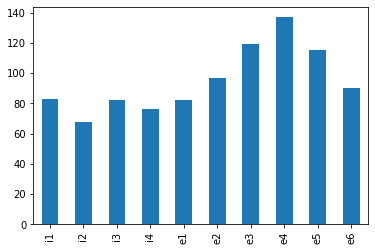

In [99]:
count.plot.bar()

In [11]:
df_analyse['spindle occuring'].value_counts()

e    2640
i    1286
Name: spindle occuring, dtype: int64

In [12]:
sum(list(df_analyse['spindle occuring'].notnull()))

3926

In [13]:
df_masked = df_analyse[df_analyse['spindle occuring'].notnull()]

In [14]:
df_masked

,n_cycle,start,transition,stop,spindle peak,spindle chan,spindle occuring
60563,15,45.320312,46.394531,47.964844,46.878906,Fz-Cz,e
61510,15,45.320312,46.394531,47.964844,46.507812,Fp1-C3,e
74803,19,57.117188,58.250000,60.234375,59.421875,Fp2-C4,e
78741,20,60.234375,61.265625,63.238281,62.152344,Fp2-C4,e
80249,20,60.234375,61.265625,63.238281,62.066406,Fz-Cz,e
...,...,...,...,...,...,...,...
15318723,3890,11251.066406,11252.062500,11254.351562,11253.000000,C3-T3,e
15328107,3893,11260.808594,11261.792969,11263.472656,11261.617188,C4-T4,i
15389732,3908,11305.285156,11306.230469,11308.312500,11306.425781,T3-O1,e
15407728,3913,11320.007812,11321.019531,11323.417969,11323.007812,Fz-Cz,e


In [15]:
df_masked['n_cycle'].value_counts()

2319    9
1838    8
3555    8
1545    8
1556    8
       ..
1754    1
1777    1
3115    1
3102    1
1376    1
Name: n_cycle, Length: 1405, dtype: int64